<a href="https://colab.research.google.com/github/eth212/Qmind_ModelNet10_PointNet/blob/main/3D_Model_Starting_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full Tutorial Link: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/pointnet.ipynb#scrollTo=uSwSzEQ_6stb



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt 
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234) # seed for the tf random number generator

In [3]:
!pip install trimesh
import trimesh
import os
DATA_DIR = "/content/drive/My Drive/Qmind Object Completion Team/ModelNet10/"

     |████████████████████████████████| 634kB 23.9MB/s 


In [4]:
mesh = trimesh.load(os.path.join(DATA_DIR,"bathtub/train/bathtub_0001.off"))
mesh

<trimesh.Trimesh(vertices.shape=(1014, 3), faces.shape=(3546, 3))>

In [5]:
def plot_pc(points, angle1=30,angle2=45, label=None):
  # omit angles for now
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection="3d")
  ax.scatter(points[:, 0], points[:, 1], points[:, 2])
  if label:
    plt.title(label)
  plt.show()

In [6]:
def parse_dataset(num_points=2048):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README, !3D_Model_Starting_Point, !Explore, !DS_Store]*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )



In [ ]:
# Takes about 20 mins
NUM_POINTS = 2048    # VERY IMPORTANT, THIS IS THE NUMBER OF RANDOM POINTS PER DATA EXAMPLE
NUM_CLASSES = 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

processing class: chair
processing class: monitor
processing class: bed
processing class: sofa
processing class: bathtub


In [ ]:
print(train_points.shape)
print(test_points.shape)

(2655, 2048, 3)
(450, 2048, 3)


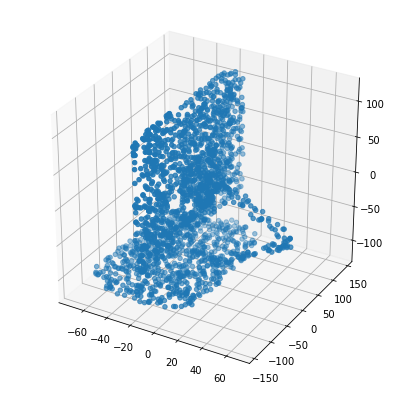

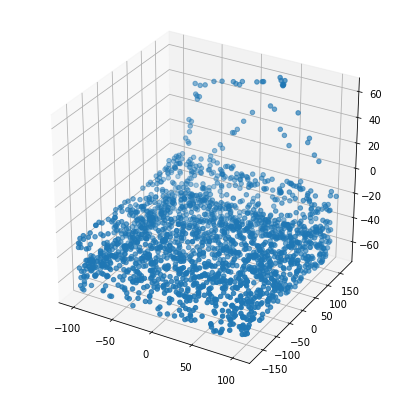

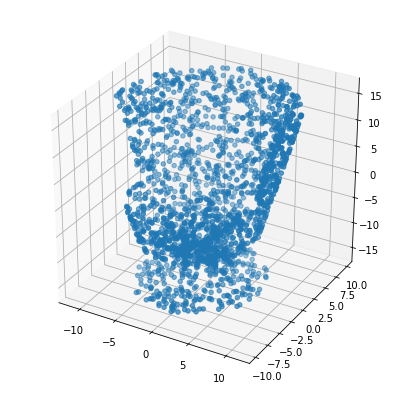

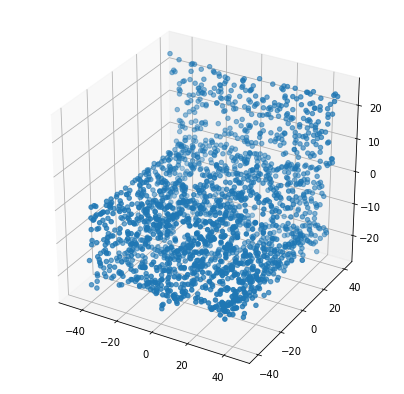

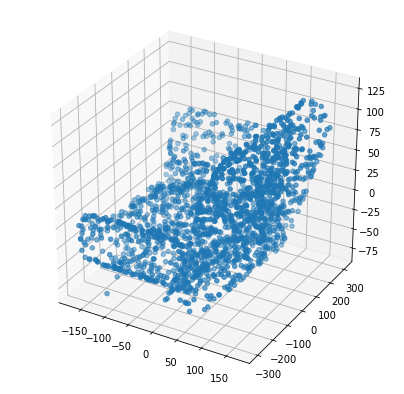

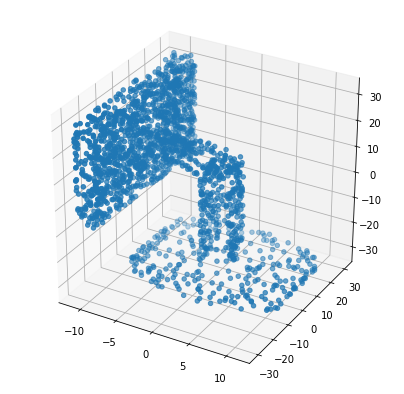

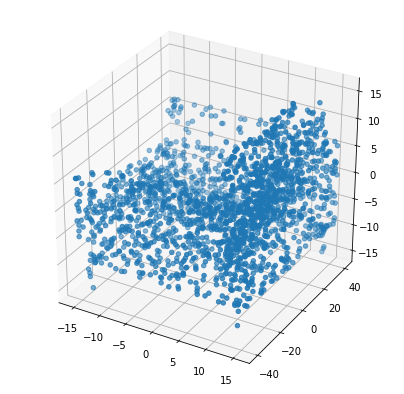

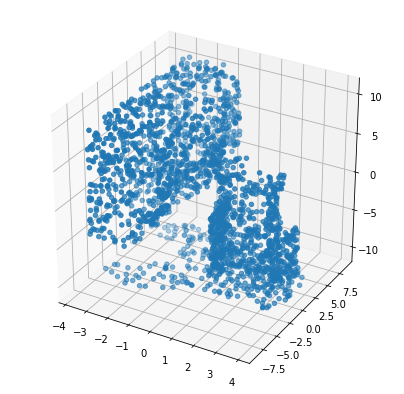

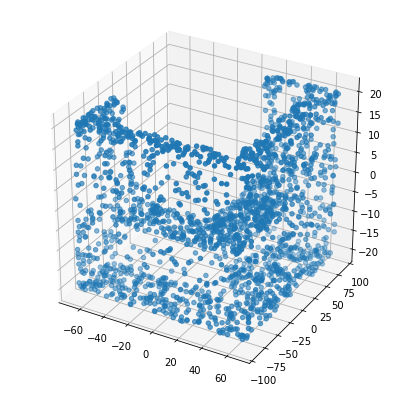

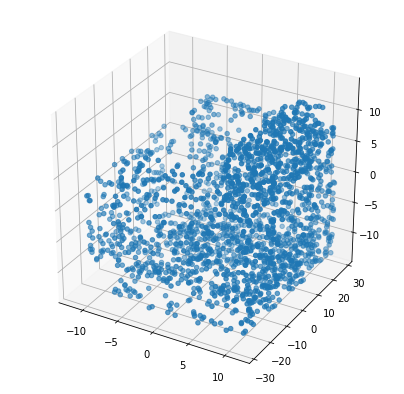

In [ ]:
for i in range(10):
  idx = np.random.randint(0,2655)
  plot_pc(train_points[idx])

**Next Steps:**
- Augment the data and add more randomness to the point cloud representations
- Pad data so that the input size is consistant (step could potentially be omitted with something else)
- Normalize data (make it easier to compute
- Design Model architecture
- Evaluate and Tweak hyperparams & architecture
- Visualize predictions
- Evaluate, Evaluate, Evaluate:
  Where does my model make mistakes? (look at confusion matrix), How does changing the data resolution effect performance? Ask yourself as many questions as possible. 

**Data Documentation**
<!-- Shape: Each physical object is represented in a 20x20x20  -->

DataSet Write-Up : http://segeval.cs.princeton.edu/public/off_format.html

**How to build CNNs on 3D data**
https://towardsdatascience.com/step-by-step-implementation-3d-convolutional-neural-network-in-keras-12efbdd7b130